<a href="https://colab.research.google.com/github/LILPANDA-BYTE/STOCK_PREIDICTION_ANALYSIS/blob/main/FORECASTING_USING_TFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Replace with the path to your file in Google Drive
file_path = '/content/drive/MyDrive/Forex_Data/DAT_ASCII_AUDCAD_M1_2007.csv'

# Define the headers
headers = ['DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume']

# Load the data into a DataFrame, specifying that there are no headers in the file
df = pd.read_csv(file_path, delimiter=";",names=headers)

# Display the first few rows of the DataFrame
print(df.head())

    DateTime Stamp  Bar OPEN Bid Quote  Bar HIGH Bid Quote  Bar LOW Bid Quote  \
0  20070930 170000              0.8832              0.8832             0.8832   
1  20071007 170000              0.8823              0.8823             0.8823   
2  20071007 170100              0.8822              0.8822             0.8822   
3  20071007 170200              0.8822              0.8823             0.8822   
4  20071014 170000              0.8799              0.8799             0.8799   

   Bar CLOSE Bid Quote  Volume  
0               0.8832       0  
1               0.8823       0  
2               0.8822       0  
3               0.8822       0  
4               0.8799       0  


In [ ]:
# Convert 'DateTime Stamp' to datetime object
df['DateTime Stamp'] = pd.to_datetime(df['DateTime Stamp'], format='%Y%m%d %H%M%S')

# Set 'DateTime Stamp' as the index (optional)
df.set_index('DateTime Stamp', inplace=True)

# Display the first few rows of the DataFrame
print(df.head())

                     Bar OPEN Bid Quote  Bar HIGH Bid Quote  \
DateTime Stamp                                                
2007-09-30 17:00:00              0.8832              0.8832   
2007-10-07 17:00:00              0.8823              0.8823   
2007-10-07 17:01:00              0.8822              0.8822   
2007-10-07 17:02:00              0.8822              0.8823   
2007-10-14 17:00:00              0.8799              0.8799   

                     Bar LOW Bid Quote  Bar CLOSE Bid Quote  Volume  
DateTime Stamp                                                       
2007-09-30 17:00:00             0.8832               0.8832       0  
2007-10-07 17:00:00             0.8823               0.8823       0  
2007-10-07 17:01:00             0.8822               0.8822       0  
2007-10-07 17:02:00             0.8822               0.8822       0  
2007-10-14 17:00:00             0.8799               0.8799       0  


In [ ]:
# Check if there are still any NaN values
print(df.isna().sum())

# Display a few rows to inspect the data
print(df.head(10))

Bar OPEN Bid Quote     0
Bar HIGH Bid Quote     0
Bar LOW Bid Quote      0
Bar CLOSE Bid Quote    0
Volume                 0
dtype: int64
                     Bar OPEN Bid Quote  Bar HIGH Bid Quote  \
DateTime Stamp                                                
2007-09-30 17:00:00              0.8832              0.8832   
2007-10-07 17:00:00              0.8823              0.8823   
2007-10-07 17:01:00              0.8822              0.8822   
2007-10-07 17:02:00              0.8822              0.8823   
2007-10-14 17:00:00              0.8799              0.8799   
2007-10-21 17:00:00              0.8598              0.8599   
2007-10-21 17:01:00              0.8598              0.8598   
2007-10-21 17:02:00              0.8595              0.8595   
2007-10-22 11:45:00              0.8620              0.8620   
2007-10-22 11:46:00              0.8617              0.8617   

                     Bar LOW Bid Quote  Bar CLOSE Bid Quote  Volume  
DateTime Stamp                     

Preproccessing the Data for TFT

In [ ]:
import pandas as pd

# Example data preparation
df['time_idx'] = pd.RangeIndex(start=0, stop=len(df), step=1)
df['group'] = 0  # If you have multiple series, assign a unique ID to each

# You may want to engineer additional features here
# For example, a rolling average:
df['SMA_5'] = df['Bar CLOSE Bid Quote'].rolling(window=5).mean()

# Fill any NaNs that may have resulted from rolling calculations
df.fillna(0, inplace=True)
df

,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume,time_idx,group,SMA_5
DateTime Stamp,,,,,,,,
2007-09-30 17:00:00,0.8832,0.8832,0.8832,0.8832,0,0,0,0.00000
2007-10-07 17:00:00,0.8823,0.8823,0.8823,0.8823,0,1,0,0.00000
2007-10-07 17:01:00,0.8822,0.8822,0.8822,0.8822,0,2,0,0.00000
2007-10-07 17:02:00,0.8822,0.8823,0.8822,0.8822,0,3,0,0.00000
2007-10-14 17:00:00,0.8799,0.8799,0.8799,0.8799,0,4,0,0.88196
...,...,...,...,...,...,...,...,...
2007-12-31 16:38:00,0.8730,0.8730,0.8730,0.8730,0,65744,0,0.87292
2007-12-31 16:39:00,0.8730,0.8730,0.8730,0.8730,0,65745,0,0.87294
2007-12-31 16:40:00,0.8731,0.8734,0.8731,0.8734,0,65746,0,0.87306


In [ ]:
! pip install torch pytorch-lightning pytorch-forecasting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.8/155.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name  

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=3` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


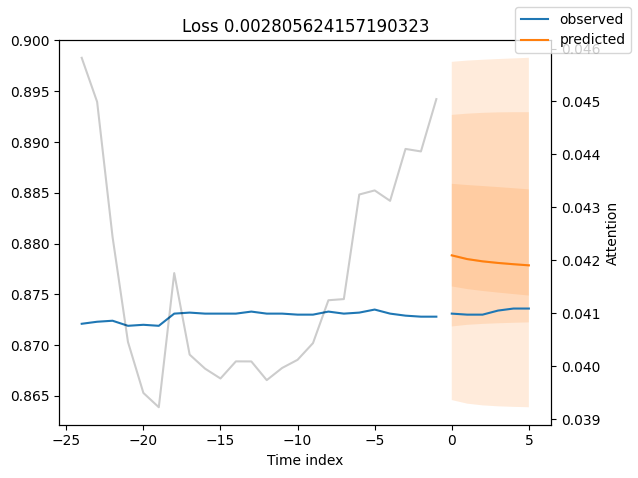

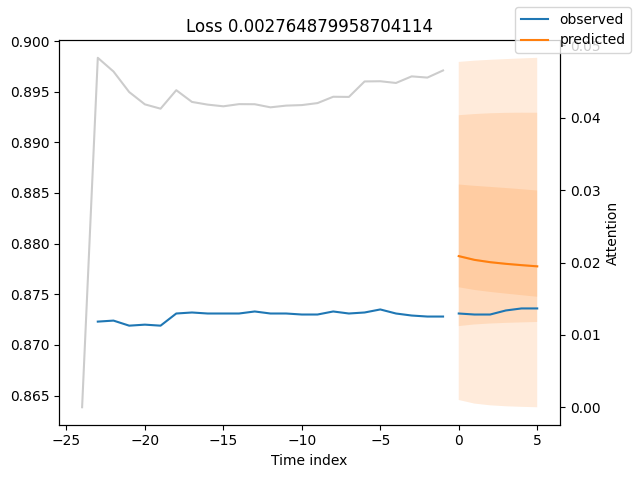

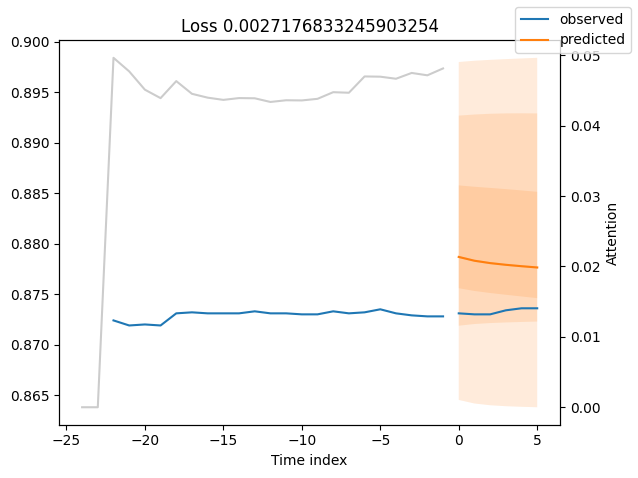

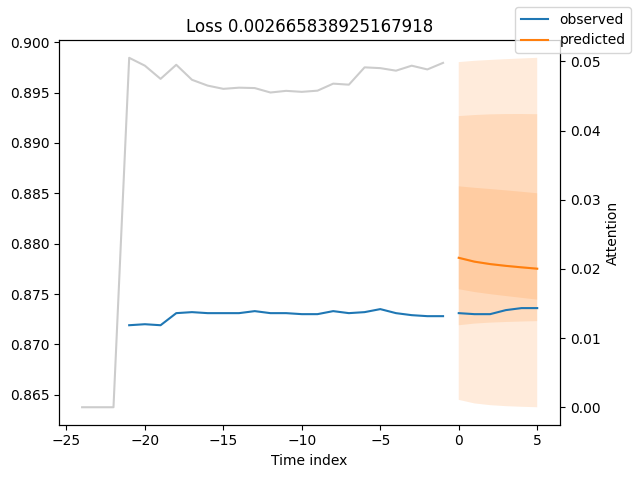

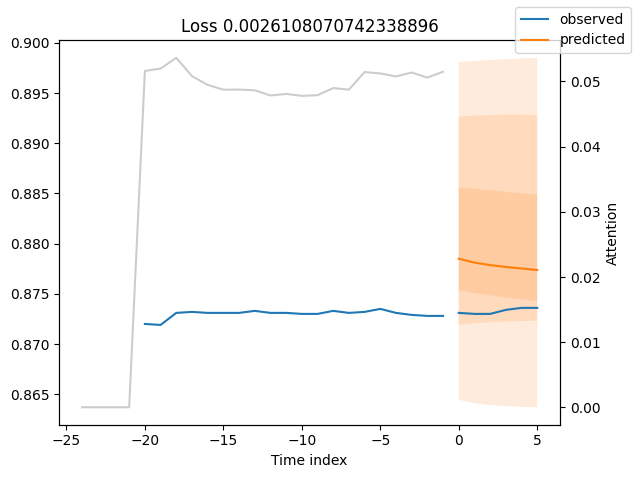

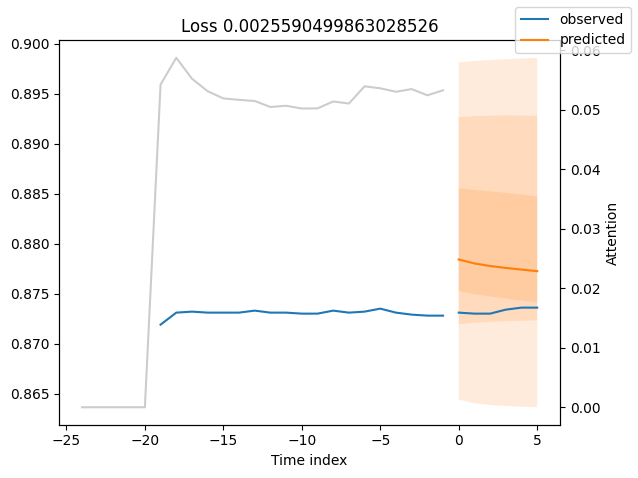

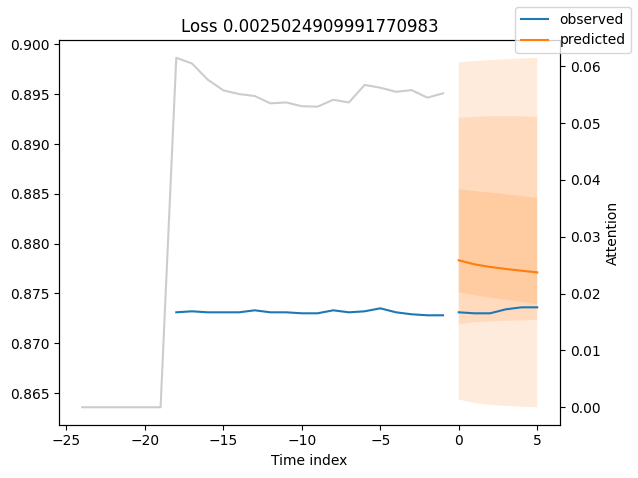

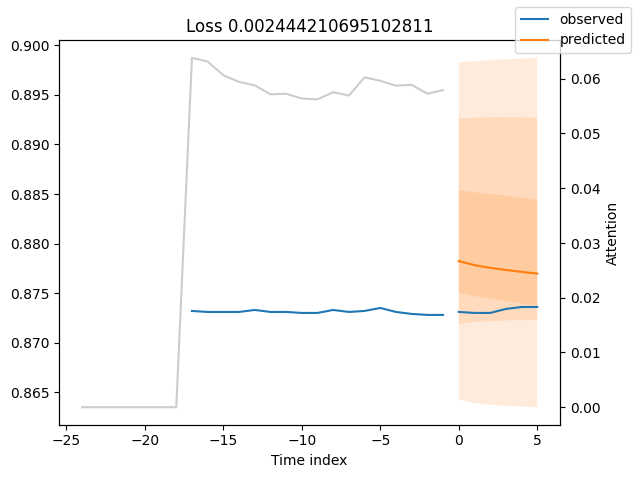

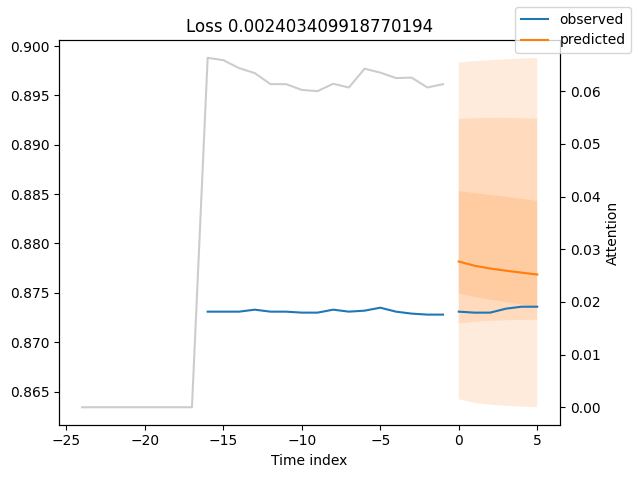

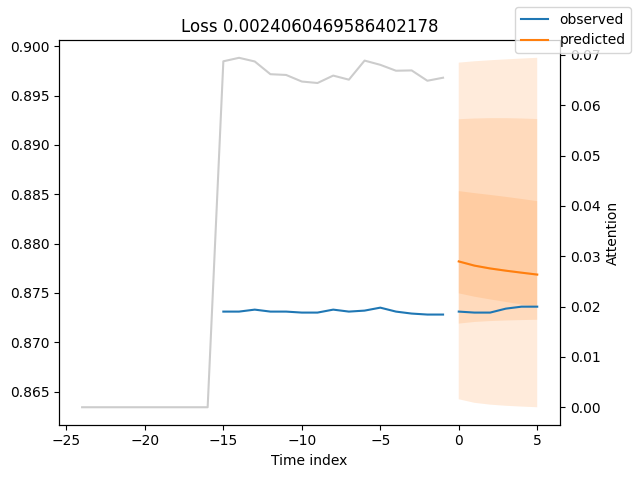

In [ ]:
import pandas as pd
import numpy as np
import torch
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import QuantileLoss
import matplotlib.pyplot as plt

# Load Forex data
file_path = '/content/drive/MyDrive/Forex_Data/DAT_ASCII_AUDCAD_M1_2007.csv'
headers = ['DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume']
df = pd.read_csv(file_path, delimiter=";", names=headers)

# Convert the DateTime Stamp to datetime and sort
df['DateTime Stamp'] = pd.to_datetime(df['DateTime Stamp'])
df = df.sort_values('DateTime Stamp')

# Create a time index and add features
df['time_idx'] = df.index
df['month'] = df['DateTime Stamp'].dt.month.astype(str).astype("category")
df['log_volume'] = np.log(df['Volume'] + 1e-8)
df['symbol'] = 'AUDCAD'
df['symbol'] = df['symbol'].astype("category")

# Define max encoder and prediction lengths
max_prediction_length = 6
max_encoder_length = 24

# Set training cutoff
training_cutoff = df["time_idx"].max() - max_prediction_length

# Create the TimeSeriesDataSet object
training = TimeSeriesDataSet(
    df[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="Bar CLOSE Bid Quote",
    group_ids=["symbol"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["symbol"],
    time_varying_known_categoricals=["month"],
    time_varying_known_reals=["time_idx"],
    time_varying_unknown_reals=["Bar OPEN Bid Quote", "Bar HIGH Bid Quote", "Bar LOW Bid Quote", "Bar CLOSE Bid Quote", "log_volume"],
    target_normalizer=GroupNormalizer(groups=["symbol"], transformation="softplus"),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

# Create validation dataset from the training dataset
validation = TimeSeriesDataSet.from_dataset(training, df, min_prediction_idx=training_cutoff + 1)

# Create dataloaders
batch_size = 64
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

# Define the TFT model
pl.seed_everything(42)
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# Define trainer with early stopping
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()
logger = TensorBoardLogger("lightning_logs")  # log to tensorboard

trainer = pl.Trainer(
    max_epochs=3,
    gradient_clip_val=0.1,
    limit_train_batches=30,  # comment in for training, running notebook exmaple for faster training
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)

# Train the model
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

# Make predictions
predictions = tft.predict(val_dataloader, mode="raw", return_x=True)

# Extracting the input data (x) and raw predictions
x = predictions.x
raw_predictions = predictions.output

for idx in range(10):  # plot 10 examples
    tft.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True)

plt.show()

In [ ]:
from pytorch_forecasting.metrics import QuantileLoss, MAE # Import MAE
predictions = tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="cpu"))
MAE()(predictions.output, predictions.y)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_forecasting/metrics/base_metrics.py:803: UserWarning: Loss is not finite. Resetting it to 1e9
  warnings.warn("Loss is not finite. Resetting it to 1e9")


tensor(7246377.)

In [ ]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions = tft.predict(val_dataloader, mode="raw", return_x=True)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


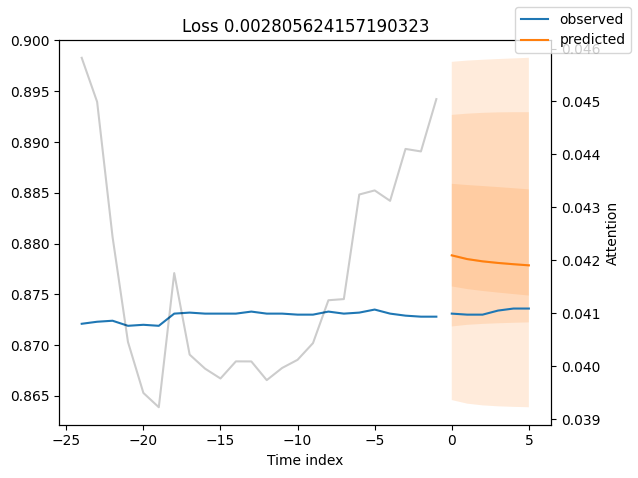

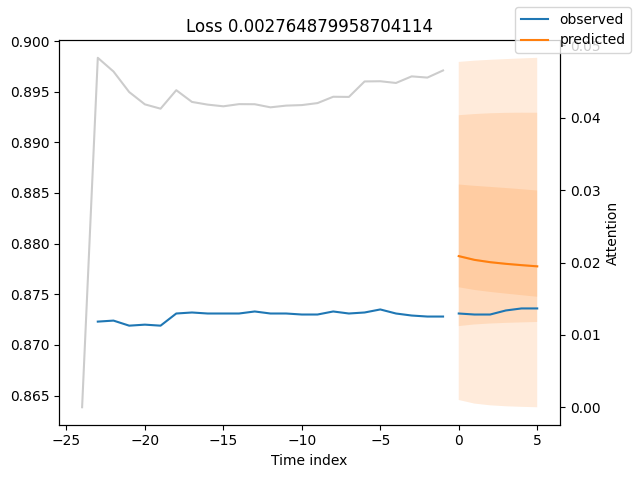

In [ ]:
for idx in range(2):  # plot 10 examples
    tft.plot_prediction(raw_predictions.x, raw_predictions.output, idx=idx, add_loss_to_title=True)

In [ ]:
from pytorch_forecasting.metrics import SMAPE

# Make predictions on the validation set
predictions = tft.predict(val_dataloader, return_y=True)

# Print the shapes of the output and y (target) tensors for debugging
print(f"Shape of predictions.output: {predictions.output.shape}")
print(f"Type of predictions.y: {type(predictions.y)}")

# If predictions.y is a tuple, inspect its contents
if isinstance(predictions.y, tuple):
    for i, item in enumerate(predictions.y):
        if item is not None:
            print(f"Shape of predictions.y[{i}]: {item.shape}")
        else:
            print(f"predictions.y[{i}] is None")

# Extract the actual target values (assuming the first element of the tuple is valid)
actual_values = predictions.y[0] if predictions.y[0] is not None else None

# Proceed only if actual_values is valid
if actual_values is not None:
    try:
        # Calculate SMAPE loss for each prediction
        mean_losses = SMAPE(reduction="none")(predictions.output, actual_values).mean(1)
    except RuntimeError as e:
        print(f"Error during SMAPE calculation: {e}")

    # Sort the predictions by loss (descending order)
    if 'mean_losses' in locals():
        indices = mean_losses.argsort(descending=True)

        # Plot the top 2 worst predictions (highest SMAPE losses)
        for idx in range(2):  # Adjust the range to plot more examples if needed
            tft.plot_prediction(
                predictions.x,
                predictions.output,
                idx=indices[idx],
                add_loss_to_title=SMAPE(quantiles=tft.loss.quantiles),
            )

        plt.show()
    else:
        print("SMAPE calculation failed. Cannot plot predictions.")
else:
    print("No valid target values found in predictions.y.")


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Shape of predictions.output: torch.Size([23, 6])
Type of predictions.y: <class 'tuple'>
Shape of predictions.y[0]: torch.Size([23, 6])
predictions.y[1] is None
Error during SMAPE calculation: zero-dimensional tensor (at position 0) cannot be concatenated
SMAPE calculation failed. Cannot plot predictions.


In [ ]:
from pytorch_forecasting.metrics import SMAPE

# Make predictions on the validation set
predictions = tft.predict(val_dataloader, return_y=True)

# Print the shapes of the output and y (target) tensors for debugging
print(f"Shape of predictions.output: {predictions.output.shape}")
print(f"Type of predictions.y: {type(predictions.y)}")

# If predictions.y is a tuple, inspect its contents
if isinstance(predictions.y, tuple):
    for i, item in enumerate(predictions.y):
        if item is not None:
            print(f"Shape of predictions.y[{i}]: {item.shape}")
        else:
            print(f"predictions.y[{i}] is None")

# Extract the actual target values (assuming the first element of the tuple is valid)
actual_values = predictions.y[0] if predictions.y[0] is not None else None

# Print the first few values for further inspection
if actual_values is not None:
    print(f"First few values of predictions.output: {predictions.output[:5]}")
    print(f"First few values of actual_values: {actual_values[:5]}")

    try:
        # Calculate SMAPE loss for each prediction with additional checks
        mean_losses = SMAPE(reduction="none")(predictions.output, actual_values)

        # Check for any zero-dimensional tensors before computing the mean
        if mean_losses.dim() > 0:
            mean_losses = mean_losses.mean(1)  # Compute the mean only if not scalar

        print(f"Mean losses shape: {mean_losses.shape}")

    except RuntimeError as e:
        print(f"Error during SMAPE calculation: {e}")

    # Sort the predictions by loss (descending order)
    if 'mean_losses' in locals() and mean_losses.dim() > 0:
        indices = mean_losses.argsort(descending=True)

        # Plot the top 2 worst predictions (highest SMAPE losses)
        for idx in range(2):  # Adjust the range to plot more examples if needed
            tft.plot_prediction(
                predictions.x,
                predictions.output,
                idx=indices[idx],
                add_loss_to_title=SMAPE(quantiles=tft.loss.quantiles),
            )

        plt.show()
    else:
        print("SMAPE calculation failed. Cannot plot predictions.")
else:
    print("No valid target values found in predictions.y.")


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Shape of predictions.output: torch.Size([23, 6])
Type of predictions.y: <class 'tuple'>
Shape of predictions.y[0]: torch.Size([23, 6])
predictions.y[1] is None
First few values of predictions.output: tensor([[0.8788, 0.8785, 0.8782, 0.8781, 0.8780, 0.8779],
        [0.8788, 0.8784, 0.8782, 0.8780, 0.8779, 0.8778],
        [0.8787, 0.8783, 0.8781, 0.8779, 0.8778, 0.8776],
        [0.8786, 0.8782, 0.8780, 0.8778, 0.8776, 0.8775],
        [0.8785, 0.8781, 0.8779, 0.8777, 0.8775, 0.8774]])
First few values of actual_values: tensor([[0.8731, 0.8730, 0.8730, 0.8734, 0.8736, 0.8736],
        [0.8731, 0.8730, 0.8730, 0.8734, 0.8736, 0.8736],
        [0.8731, 0.8730, 0.8730, 0.8734, 0.8736, 0.8736],
        [0.8731, 0.8730, 0.8730, 0.8734, 0.8736, 0.8736],
        [0.8731, 0.8730, 0.8730, 0.8734, 0.8736, 0.8736]])
Error during SMAPE calculation: zero-dimensional tensor (at position 0) cannot be concatenated
SMAPE calculation failed. Cannot plot predictions.


In [ ]:
from pytorch_forecasting.metrics import SMAPE
import torch

# Make predictions on the validation set
predictions = tft.predict(val_dataloader, return_y=True)

# Print the shapes of the output and y (target) tensors for debugging
print(f"Shape of predictions.output: {predictions.output.shape}")
print(f"Type of predictions.y: {type(predictions.y)}")

# If predictions.y is a tuple, inspect its contents
if isinstance(predictions.y, tuple):
    for i, item in enumerate(predictions.y):
        if item is not None:
            print(f"Shape of predictions.y[{i}]: {item.shape}")
        else:
            print(f"predictions.y[{i}] is None")

# Extract the actual target values (assuming the first element of the tuple is valid)
actual_values = predictions.y[0] if predictions.y[0] is not None else None

# Print the first few values for further inspection
if actual_values is not None:
    print(f"First few values of predictions.output: {predictions.output[:5]}")
    print(f"First few values of actual_values: {actual_values[:5]}")

    try:
        # Calculate SMAPE loss for each prediction with additional checks
        mean_losses = SMAPE(reduction="none")(predictions.output, actual_values)

        # Check for any zero-dimensional tensors before computing the mean
        if mean_losses.dim() > 0:
            # Ensure that mean_losses is not a scalar before performing operations
            mean_losses = mean_losses.mean(1) if mean_losses.shape[0] > 1 else mean_losses

        print(f"Mean losses shape: {mean_losses.shape}")

    except RuntimeError as e:
        print(f"Error during SMAPE calculation: {e}")

    # Sort the predictions by loss (descending order)
    if 'mean_losses' in locals() and mean_losses.dim() > 0 and mean_losses.shape[0] > 1:
        indices = mean_losses.argsort(descending=True)

        # Plot the top 2 worst predictions (highest SMAPE losses)
        for idx in range(2):  # Adjust the range to plot more examples if needed
            tft.plot_prediction(
                predictions.x,
                predictions.output,
                idx=indices[idx],
                add_loss_to_title=SMAPE(quantiles=tft.loss.quantiles),
            )

        plt.show()
    else:
        print("SMAPE calculation failed. Cannot plot predictions.")
else:
    print("No valid target values found in predictions.y.")


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Shape of predictions.output: torch.Size([23, 6])
Type of predictions.y: <class 'tuple'>
Shape of predictions.y[0]: torch.Size([23, 6])
predictions.y[1] is None
First few values of predictions.output: tensor([[0.8788, 0.8785, 0.8782, 0.8781, 0.8780, 0.8779],
        [0.8788, 0.8784, 0.8782, 0.8780, 0.8779, 0.8778],
        [0.8787, 0.8783, 0.8781, 0.8779, 0.8778, 0.8776],
        [0.8786, 0.8782, 0.8780, 0.8778, 0.8776, 0.8775],
        [0.8785, 0.8781, 0.8779, 0.8777, 0.8775, 0.8774]])
First few values of actual_values: tensor([[0.8731, 0.8730, 0.8730, 0.8734, 0.8736, 0.8736],
        [0.8731, 0.8730, 0.8730, 0.8734, 0.8736, 0.8736],
        [0.8731, 0.8730, 0.8730, 0.8734, 0.8736, 0.8736],
        [0.8731, 0.8730, 0.8730, 0.8734, 0.8736, 0.8736],
        [0.8731, 0.8730, 0.8730, 0.8734, 0.8736, 0.8736]])
Error during SMAPE calculation: zero-dimensional tensor (at position 0) cannot be concatenated
SMAPE calculation failed. Cannot plot predictions.


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


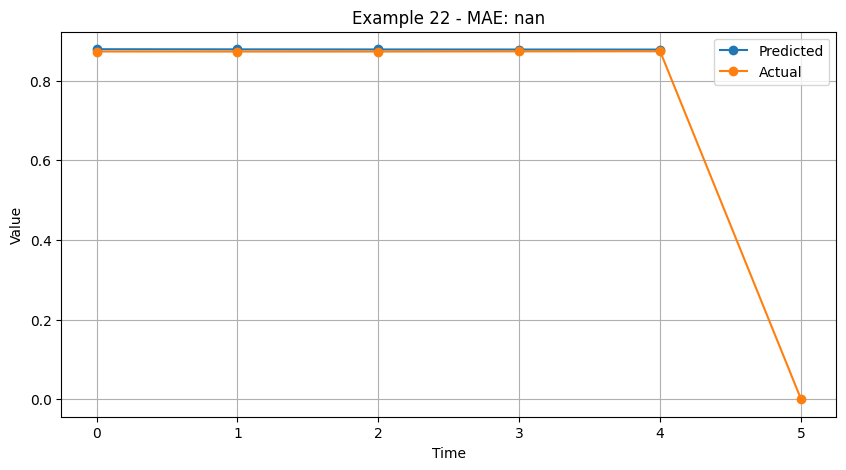

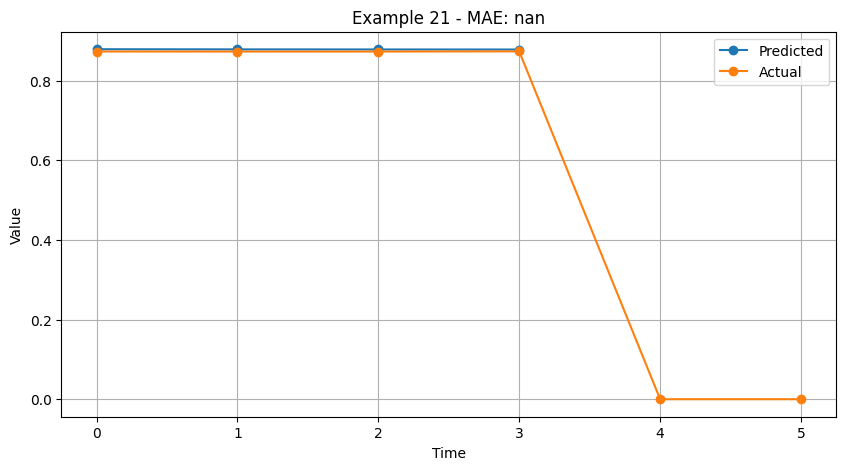

In [ ]:
import torch
import matplotlib.pyplot as plt

# Define a function to compute MAE
def compute_mae(predictions, actual_values):
    return torch.abs(predictions - actual_values).mean(dim=1)

# Make predictions on the validation set
predictions = tft.predict(val_dataloader, return_y=True)

# Check if predictions.y is not None and contains valid data
if predictions.y[0] is not None:
    actual_values = predictions.y[0]  # Assuming the first element is valid

    if actual_values is not None:
        # Compute MAE
        mae_values = compute_mae(predictions.output, actual_values)

        # Get the indices of the top examples with highest MAE
        indices = mae_values.argsort(descending=True)

        # Plot the top 2 worst predictions
        for idx in range(2):  # Adjust this to plot more examples if needed
            plt.figure(figsize=(10, 5))
            plt.plot(predictions.output[indices[idx]].detach().cpu().numpy(), label='Predicted', marker='o')
            plt.plot(actual_values[indices[idx]].detach().cpu().numpy(), label='Actual', marker='o')
            plt.title(f'Example {indices[idx].item()} - MAE: {mae_values[indices[idx]].item():.4f}')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.legend()
            plt.grid(True)
            plt.show()
    else:
        print("Actual values are not available.")
else:
    print("No valid target values found in predictions.y.")

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


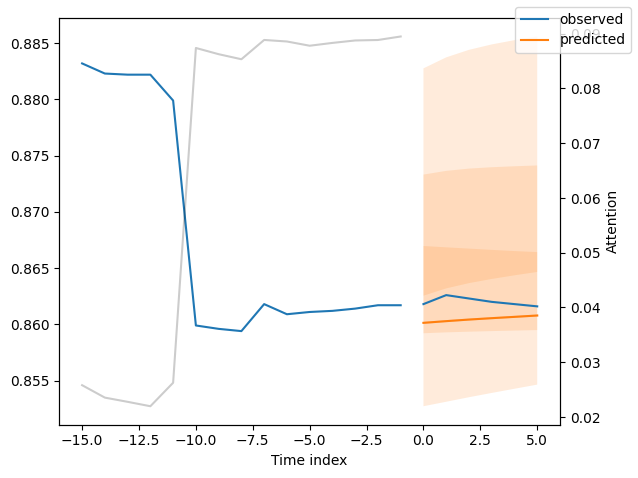

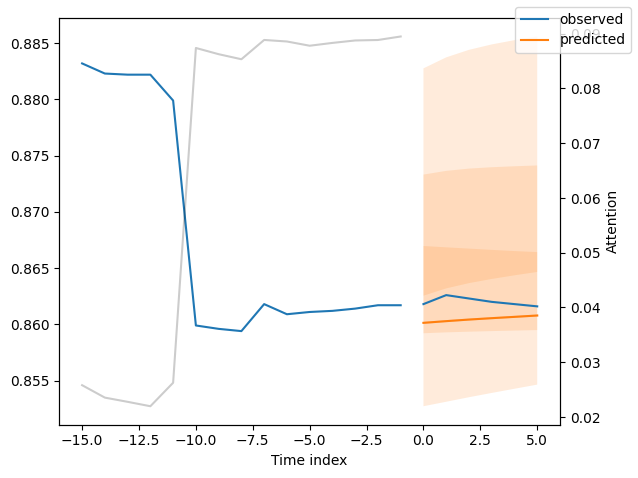

In [ ]:
raw_prediction = tft.predict(
    training.filter(lambda x: (x.time_idx_first_prediction == 15)),
    mode="raw",
    return_x=True,
)
tft.plot_prediction(raw_prediction.x, raw_prediction.output, idx=0)

In [ ]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
INFO: GPU available: False, used

Model saved to /content/drive/My Drive/tft_model.pkl
Model loaded successfully.


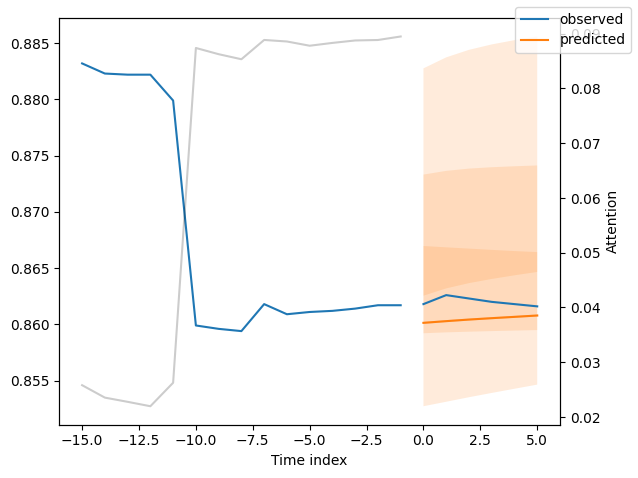

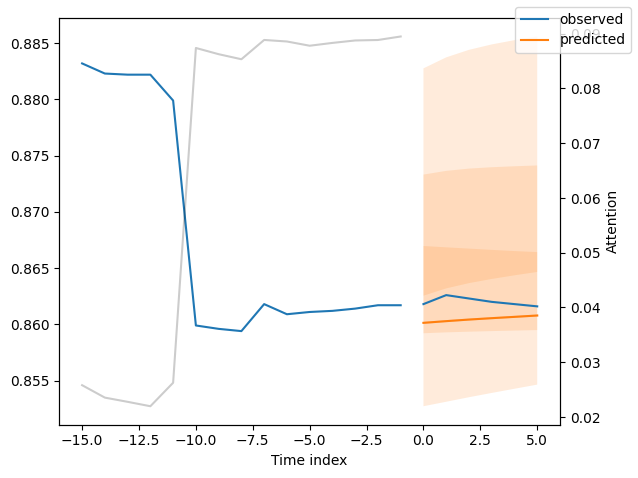

In [ ]:
import pickle
# Path to save the model in Google Drive
model_save_path = "/content/drive/My Drive/tft_model.pkl"

# Save the trained model to Google Drive
with open(model_save_path, 'wb') as f:
    pickle.dump(best_tft, f)

print(f"Model saved to {model_save_path}")

# Load the model back from Google Drive
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully.")

# Make predictions on a filtered dataset
raw_prediction = loaded_model.predict(
    training.filter(lambda x: (x.time_idx_first_prediction == 15)),
    mode="raw",
    return_x=True,
)

# Plot the prediction
loaded_model.plot_prediction(raw_prediction.x, raw_prediction.output, idx=0)

ADDING FEATURES

In [ ]:
data=df.copy()

In [ ]:
import pandas as pd

# Example of creating lag features for multiple lags
lags = [1, 2, 3, 5, 10]
for lag in lags:
    data[f'lag_{lag}_open'] = data['Bar OPEN Bid Quote'].shift(lag)
    data[f'lag_{lag}_high'] = data['Bar HIGH Bid Quote'].shift(lag)
    data[f'lag_{lag}_low'] = data['Bar LOW Bid Quote'].shift(lag)
    data[f'lag_{lag}_close'] = data['Bar CLOSE Bid Quote'].shift(lag)
    data[f'lag_{lag}_volume'] = data['Volume'].shift(lag)

# Creating rolling statistics features
windows = [3, 5, 10, 20]
for window in windows:
    data[f'roll_mean_{window}_close'] = data['Bar CLOSE Bid Quote'].rolling(window=window).mean()
    data[f'roll_std_{window}_close'] = data['Bar CLOSE Bid Quote'].rolling(window=window).std()
    data[f'roll_mean_{window}_high'] = data['Bar HIGH Bid Quote'].rolling(window=window).mean()
    data[f'roll_mean_{window}_low'] = data['Bar LOW Bid Quote'].rolling(window=window).mean()
    data[f'roll_mean_{window}_open'] = data['Bar OPEN Bid Quote'].rolling(window=window).mean()
    data[f'roll_sum_{window}_volume'] = data['Volume'].rolling(window=window).sum()

# Creating interaction features
data['high_low_diff'] = data['Bar HIGH Bid Quote'] - data['Bar LOW Bid Quote']
data['close_open_diff'] = data['Bar CLOSE Bid Quote'] - data['Bar OPEN Bid Quote']
data['high_close_diff'] = data['Bar HIGH Bid Quote'] - data['Bar CLOSE Bid Quote']

# Moving Averages and Crossover Strategy
data['MA_5'] = data['Bar CLOSE Bid Quote'].rolling(window=5).mean()
data['MA_20'] = data['Bar CLOSE Bid Quote'].rolling(window=20).mean()
data['MA_crossover'] = data['MA_5'] - data['MA_20']
data['MA_crossover_shifted'] = data['MA_crossover'].shift(1)

# Function to calculate RSI
def calculate_rsi(series, window):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI_14'] = calculate_rsi(data['Bar CLOSE Bid Quote'], window=14)

# Function to calculate MACD
def calculate_macd(series, slow=26, fast=12, signal=9):
    exp1 = series.ewm(span=fast, adjust=False).mean()
    exp2 = series.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    macd_diff = macd - signal_line
    return macd, signal_line, macd_diff

data['MACD'], data['MACD_signal'], data['MACD_diff'] = calculate_macd(data['Bar CLOSE Bid Quote'])

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(series, window=20, num_std=2):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return rolling_mean, upper_band, lower_band

data['BB_middle'], data['BB_upper'], data['BB_lower'] = calculate_bollinger_bands(data['Bar CLOSE Bid Quote'])

# Dropping rows with NaN values created by lag/rolling operations
data = data.dropna()

# Optional: Normalize/Standardize the features (if using neural networks)
from sklearn.preprocessing import StandardScaler

# List of features to scale (exclude target and categorical features)
features_to_scale = data.columns.difference(['Target', 'Date', 'Other_Categorical_Features'])

scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Check the first few rows of the processed data
data.head()


,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume,time_idx,group,SMA_5,lag_1_open,lag_1_high,...,MA_20,MA_crossover,MA_crossover_shifted,RSI_14,MACD,MACD_signal,MACD_diff,BB_middle,BB_upper,BB_lower
DateTime Stamp,,,,,,,,,,,,,,,,,,,,,
2007-10-22 11:57:00,-0.834736,-0.839697,-0.829664,-0.843621,0.0,-1.732024,0.0,-0.802841,-0.799134,-0.812974,...,-0.508498,-7.310309,-9.599506,1.031569,-17.921066,-20.714515,5.302936,-0.508498,0.920316,-1.925884
2007-10-22 11:58:00,-0.852528,-0.812993,-0.847444,-0.799143,0.0,-1.731972,0.0,-0.811738,-0.834717,-0.839678,...,-0.598410,-5.301243,-7.305039,1.333624,-16.915159,-20.143897,6.759879,-0.598410,0.654169,-1.840711
2007-10-22 11:59:00,-0.808049,-0.812993,-0.811885,-0.799143,0.0,-1.731919,0.0,-0.815297,-0.852509,-0.812974,...,-0.687877,-3.170751,-5.297380,0.219799,-15.934293,-19.480239,7.862742,-0.687877,0.333142,-1.700175
2007-10-22 12:00:00,-0.790257,-0.777388,-0.811885,-0.799143,0.0,-1.731866,0.0,-0.813518,-0.808030,-0.812974,...,-0.777344,-0.907792,-3.168379,1.202182,-14.984224,-18.748654,8.667930,-0.777344,-0.096036,-1.452289
2007-10-22 12:01:00,-0.808049,-0.821895,-0.829664,-0.825829,0.0,-1.731814,0.0,-0.813518,-0.790238,-0.777369,...,-0.857909,1.090235,-0.907005,0.672050,-14.162474,-17.989828,8.990828,-0.857909,-0.773447,-0.940281


The Augmented Dickey-Fuller test is a common statistical test to determine if a time series is stationary. If the p-value from the test is below a certain threshold (usually 0.05), you can reject the null hypothesis that the time series has a unit root, which means the series is stationary.

ADF Statistic: -2.566627402292137
p-value: 0.10009271340570675
Critical Values:
   1%, -3.4304495138926385
Critical Values:
   5%, -2.861583983328601
Critical Values:
   10%, -2.5667934108307873


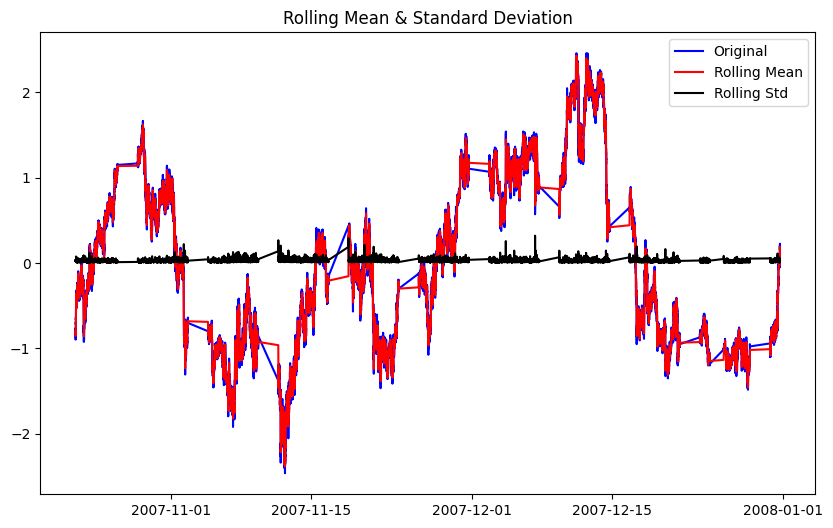

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Function to perform the ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')

# Check stationarity for the 'Bar CLOSE Bid Quote' series
adf_test(data['Bar CLOSE Bid Quote'])

# Plot rolling mean and variance
def plot_rolling_statistics(series, window=12):
    rolling_mean = series.rolling(window).mean()
    rolling_std = series.rolling(window).std()

    plt.figure(figsize=(10, 6))
    plt.plot(series, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# Plot rolling statistics for the 'Bar CLOSE Bid Quote' series
plot_rolling_statistics(data['Bar CLOSE Bid Quote'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ADF Statistic: -5.469675100573175
p-value: 2.4144304100127954e-06
Critical Values:
   1%, -3.4305658510171133
Critical Values:
   5%, -2.8616354003494893
Critical Values:
   10%, -2.566820778688771


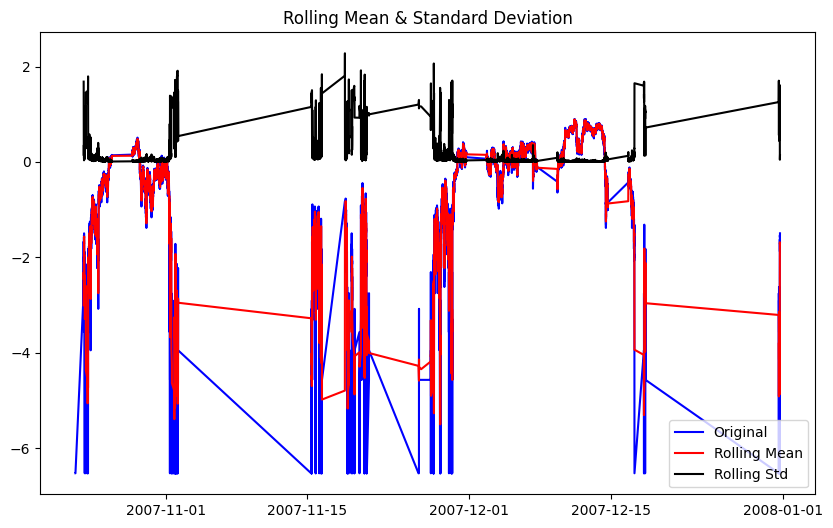

In [ ]:
import numpy as np
# Apply log transformation
data['log_close'] = np.log(data['Bar CLOSE Bid Quote'])

# Check stationarity after log transformation
adf_test(data['log_close'].dropna())

# Plot rolling statistics after log transformation
plot_rolling_statistics(data['log_close'].dropna())

RuntimeWarning: invalid value encountered in log. This usually happens when there are non-positive values (zero or negative) in the data, and the log transformation cannot be applied to them.

To handle this issue, you should adjust your data before applying the log transformation. Here are a few options:

Shift the Series: If there are zeros or negative values, you can add a small constant to the series to make all values positive before applying the log transformation.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ADF Statistic: -4.82659047525248
p-value: 4.8361541251448744e-05
Critical Values:
   1%, -3.430470448100997
Critical Values:
   5%, -2.8615932356797513
Critical Values:
   10%, -2.5667983355755117


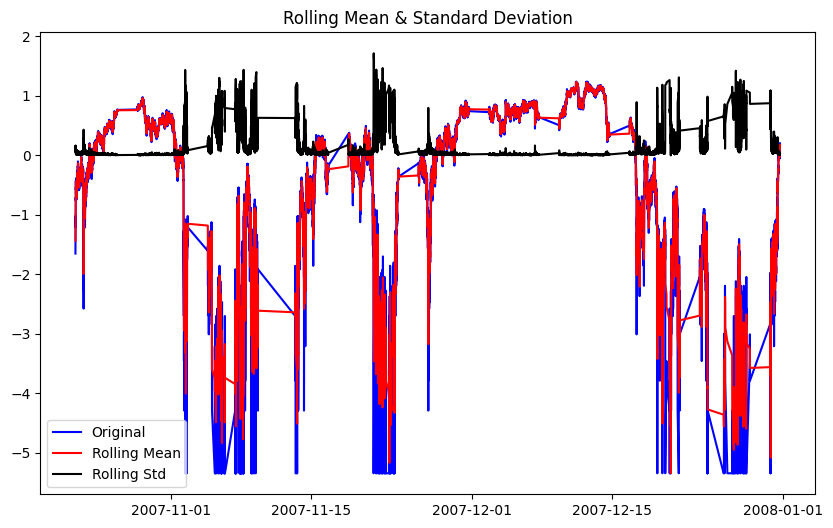

In [ ]:
import numpy as np

# Add a small constant to avoid taking log of non-positive values
data['shifted_close'] = data['Bar CLOSE Bid Quote'] + 1
data['log_close'] = np.log(data['shifted_close'])

# Perform the ADF test on the log-transformed data
adf_test(data['log_close'].dropna())

# Plot rolling statistics after log transformation
plot_rolling_statistics(data['log_close'].dropna())

In [ ]:
non_positive_values = data[data['Bar CLOSE Bid Quote'] <= 0]
print(non_positive_values)

                     Bar OPEN Bid Quote  Bar HIGH Bid Quote  \
DateTime Stamp                                                
2007-10-22 12:37:00           -0.790679           -0.804511   
2007-10-22 12:38:00           -0.799574           -0.804511   
2007-10-22 12:39:00           -0.799574           -0.786710   
2007-10-22 12:40:00           -0.763994           -0.777809   
2007-10-22 12:41:00           -0.772889           -0.760008   
...                                 ...                 ...   
2007-12-31 16:00:00           -0.016823           -0.030173   
2007-12-31 16:01:00           -0.043508           -0.056874   
2007-12-31 16:02:00           -0.070192           -0.056874   
2007-12-31 16:03:00           -0.034613            0.005429   
2007-12-31 16:04:00            0.018757            0.005429   

                     Bar LOW Bid Quote  Bar CLOSE Bid Quote  Volume  \
DateTime Stamp                                                        
2007-10-22 12:37:00          -0.803415

In [ ]:
# Option 2: Replace zero and negative values with a small constant
data['safe_close'] = data['Bar CLOSE Bid Quote'].apply(lambda x: x if x > 0 else 1e-10)
data['log_close'] = np.log(data['safe_close'])
data

,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume,lag_1_open,lag_1_high,lag_1_low,lag_1_close,lag_1_volume,...,RSI_14,MACD,MACD_signal,MACD_diff,BB_middle,BB_upper,BB_lower,log_close,shifted_close,safe_close
DateTime Stamp,,,,,,,,,,,,,,,,,,,,,
2007-10-22 12:37:00,-0.790679,-0.804511,-0.803415,-0.808455,0.0,-0.799555,-0.795591,-0.785619,-0.781752,0.0,...,-0.221845,0.594673,0.514963,0.354841,-0.825818,-0.824912,-0.825371,-23.025851,0.191545,1.000000e-10
2007-10-22 12:38:00,-0.799574,-0.804511,-0.803415,-0.790666,0.0,-0.790660,-0.804492,-0.803396,-0.808436,0.0,...,0.080219,0.611114,0.542994,0.324689,-0.822258,-0.821890,-0.821282,-23.025851,0.209334,1.000000e-10
2007-10-22 12:39:00,-0.799574,-0.786710,-0.785638,-0.772876,0.0,-0.799555,-0.804492,-0.803396,-0.790647,0.0,...,0.474752,0.680487,0.580291,0.432073,-0.817807,-0.816855,-0.817418,-23.025851,0.227124,1.000000e-10
2007-10-22 12:40:00,-0.763994,-0.777809,-0.758972,-0.763981,0.0,-0.799555,-0.786691,-0.785619,-0.772858,0.0,...,0.926556,0.758786,0.626915,0.540155,-0.812021,-0.813535,-0.809194,-23.025851,0.236019,1.000000e-10
2007-10-22 12:41:00,-0.772889,-0.760008,-0.758972,-0.755087,0.0,-0.763975,-0.777790,-0.758953,-0.763963,0.0,...,0.679064,0.843186,0.682308,0.641778,-0.804900,-0.814589,-0.793970,-23.025851,0.244913,1.000000e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-31 16:38:00,0.169970,0.156736,0.183235,0.169961,0.0,0.178880,0.165651,0.192139,0.178870,0.0,...,-0.442966,1.043861,1.499762,-1.103299,0.178687,0.138001,0.218784,-1.772186,1.169961,1.699610e-01
2007-12-31 16:39:00,0.169970,0.156736,0.183235,0.169961,0.0,0.169985,0.156750,0.183250,0.169976,0.0,...,-0.173409,0.968369,1.407423,-1.070221,0.178242,0.137797,0.218100,-1.772186,1.169961,1.699610e-01
2007-12-31 16:40:00,0.178865,0.192338,0.192124,0.205540,0.0,0.169985,0.156750,0.183250,0.169976,0.0,...,0.372174,1.025153,1.345725,-0.715132,0.179132,0.140937,0.216755,-1.582116,1.205540,2.055398e-01


ADF Statistic: -5.469675100573175
p-value: 2.4144304100127954e-06
Critical Values:
   1%, -3.4305658510171133
Critical Values:
   5%, -2.8616354003494893
Critical Values:
   10%, -2.566820778688771


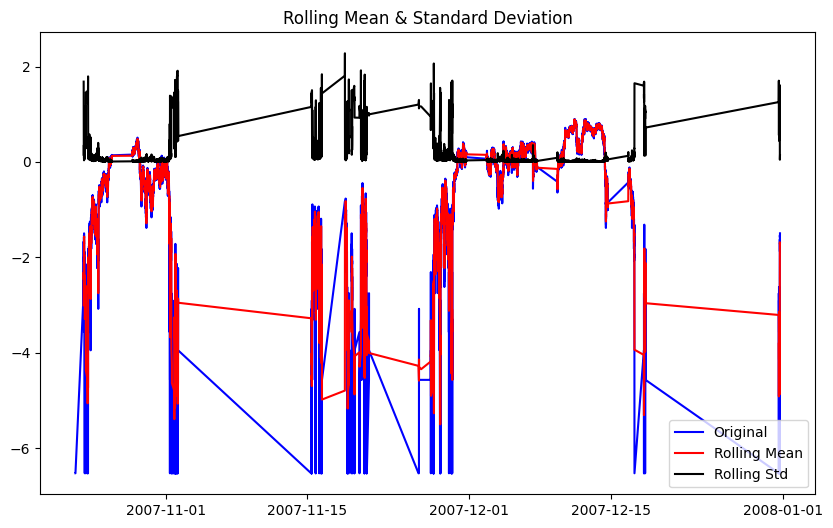

In [ ]:
# Perform the ADF test on the log-transformed data
adf_test(data['log_close'].dropna())

# Plot rolling statistics after log transformation
plot_rolling_statistics(data['log_close'].dropna())

Inverse Transformation: Remember that after making predictions, you need to apply the inverse of the log transformation (exponentiation) to convert the predictions back to the original scale.


In [ ]:
df=data.copy()
df.head()

,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume,time_idx,group,SMA_5,lag_1_open,lag_1_high,...,MA_crossover,MA_crossover_shifted,RSI_14,MACD,MACD_signal,MACD_diff,BB_middle,BB_upper,BB_lower,log_close
DateTime Stamp,,,,,,,,,,,,,,,,,,,,,
2007-10-22 11:57:00,-0.834736,-0.839697,-0.829664,-0.843621,0.0,-1.732024,0.0,-0.802841,-0.799134,-0.812974,...,-7.310309,-9.599506,1.031569,-17.921066,-20.714515,5.302936,-0.508498,0.920316,-1.925884,NaN
2007-10-22 11:58:00,-0.852528,-0.812993,-0.847444,-0.799143,0.0,-1.731972,0.0,-0.811738,-0.834717,-0.839678,...,-5.301243,-7.305039,1.333624,-16.915159,-20.143897,6.759879,-0.598410,0.654169,-1.840711,NaN
2007-10-22 11:59:00,-0.808049,-0.812993,-0.811885,-0.799143,0.0,-1.731919,0.0,-0.815297,-0.852509,-0.812974,...,-3.170751,-5.297380,0.219799,-15.934293,-19.480239,7.862742,-0.687877,0.333142,-1.700175,NaN
2007-10-22 12:00:00,-0.790257,-0.777388,-0.811885,-0.799143,0.0,-1.731866,0.0,-0.813518,-0.808030,-0.812974,...,-0.907792,-3.168379,1.202182,-14.984224,-18.748654,8.667930,-0.777344,-0.096036,-1.452289,NaN
2007-10-22 12:01:00,-0.808049,-0.821895,-0.829664,-0.825829,0.0,-1.731814,0.0,-0.813518,-0.790238,-0.777369,...,1.090235,-0.907005,0.672050,-14.162474,-17.989828,8.990828,-0.857909,-0.773447,-0.940281,NaN


INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name  

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=3` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


<class 'pytorch_forecasting.utils.TupleOutputMixIn.to_network_output.<locals>.Output'>
tensor([[2.4544, 2.4547, 2.4549, 2.4551, 2.4553, 2.4554],
        [2.4545, 2.4548, 2.4550, 2.4552, 2.4554, 2.4555],
        [2.4546, 2.4549, 2.4551, 2.4553, 2.4555, 2.4556],
        [2.4547, 2.4551, 2.4553, 2.4555, 2.4556, 2.4558],
        [2.4549, 2.4552, 2.4554, 2.4556, 2.4558, 2.4560],
        [2.4550, 2.4553, 2.4556, 2.4558, 2.4559, 2.4561],
        [2.4552, 2.4555, 2.4557, 2.4559, 2.4561, 2.4563],
        [2.4553, 2.4557, 2.4559, 2.4561, 2.4563, 2.4565],
        [2.4555, 2.4558, 2.4561, 2.4563, 2.4565, 2.4567],
        [2.4555, 2.4559, 2.4561, 2.4563, 2.4565, 2.4567],
        [2.4554, 2.4558, 2.4560, 2.4563, 2.4565, 2.4567],
        [2.4553, 2.4556, 2.4559, 2.4561, 2.4564, 2.4566],
        [2.4550, 2.4554, 2.4557, 2.4559, 2.4562, 2.4564],
        [2.4550, 2.4554, 2.4557, 2.4560, 2.4562, 2.4563],
        [2.4551, 2.4555, 2.4557, 2.4560, 2.4563, 2.4563],
        [2.4551, 2.4555, 2.4558, 2.4562, 2.

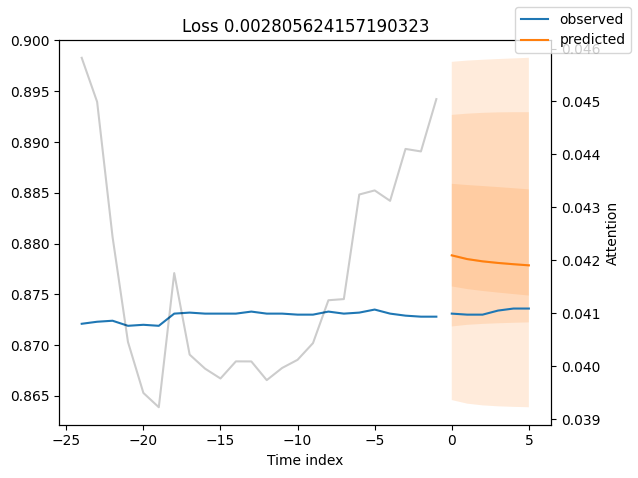

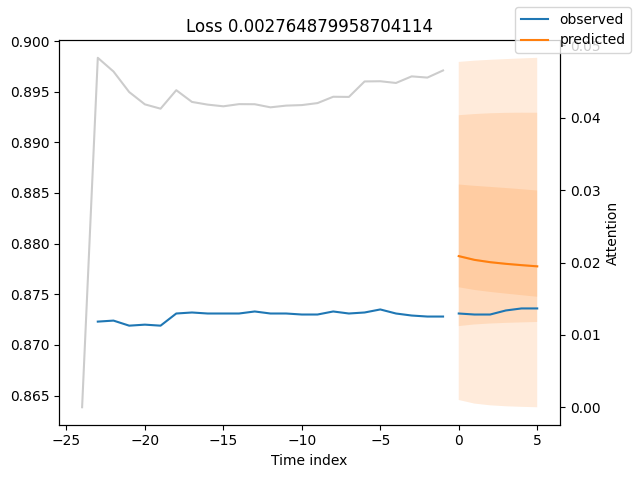

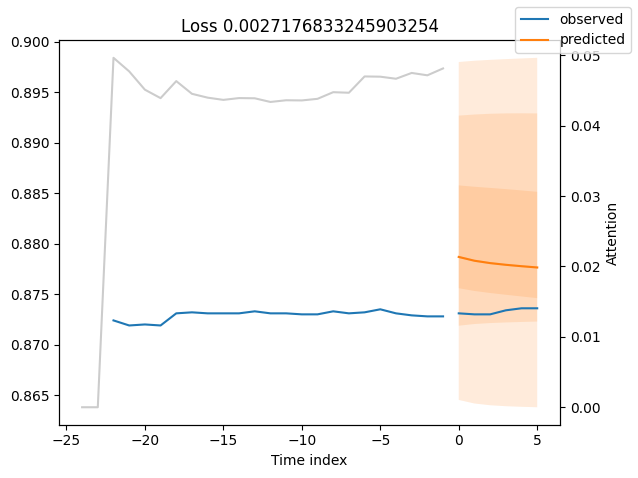

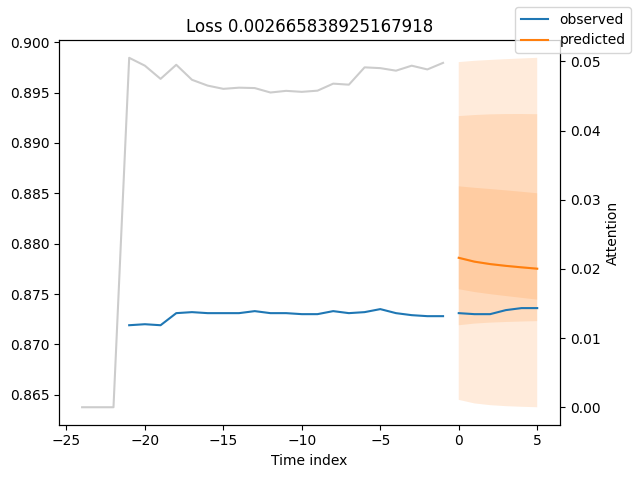

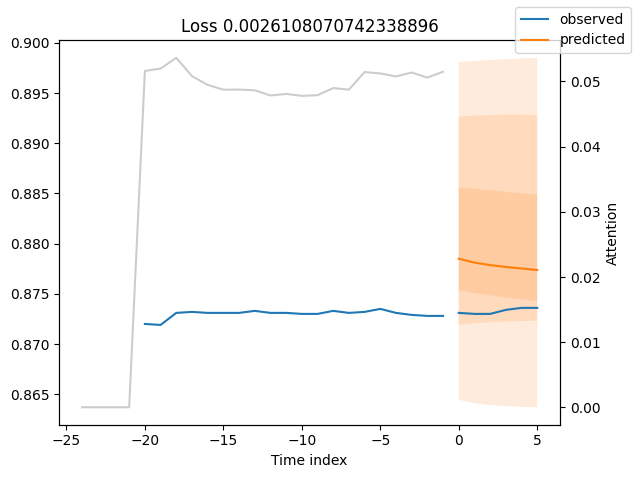

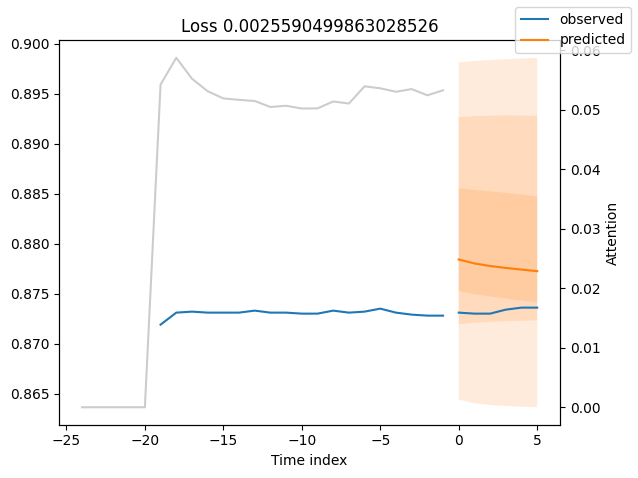

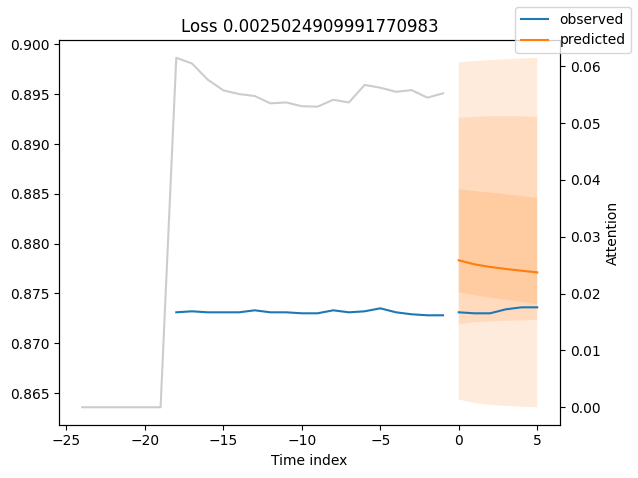

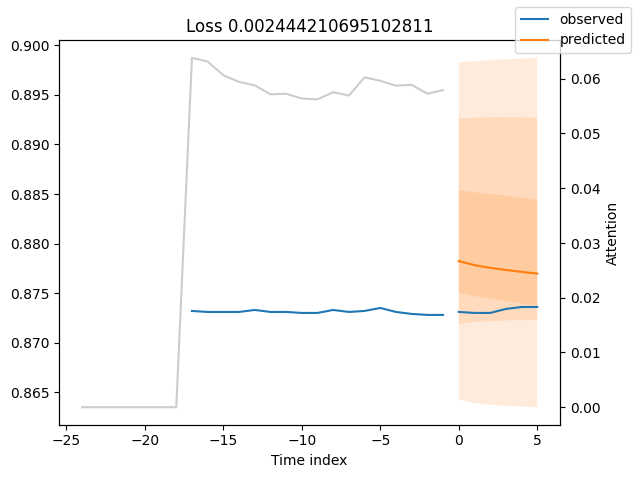

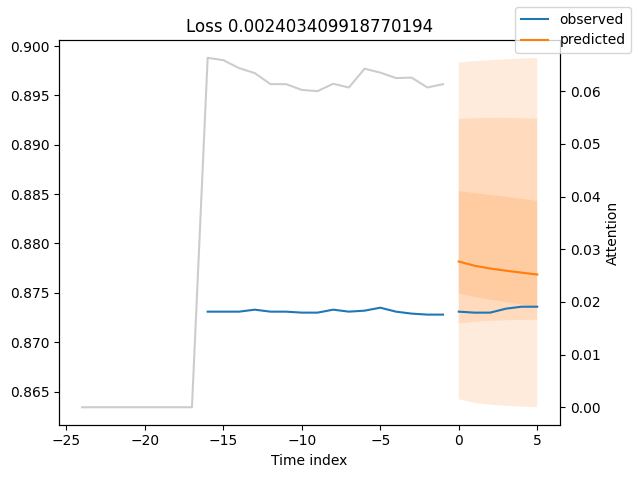

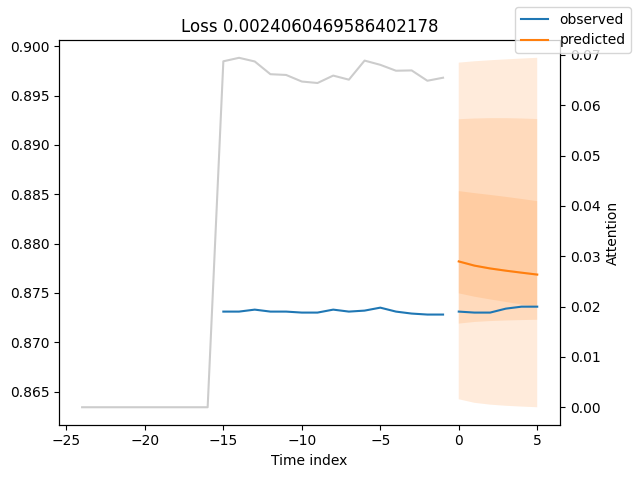

In [ ]:
import pandas as pd
import numpy as np
import torch
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import QuantileLoss
import matplotlib.pyplot as plt

# Load Forex data
file_path = '/content/drive/MyDrive/Forex_Data/DAT_ASCII_AUDCAD_M1_2007.csv'
headers = ['DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume']
df = pd.read_csv(file_path, delimiter=";", names=headers)

# Convert the DateTime Stamp to datetime and sort
df['DateTime Stamp'] = pd.to_datetime(df['DateTime Stamp'])
df = df.sort_values('DateTime Stamp')

# Create a time index and add features
df['time_idx'] = df.index
df['month'] = df['DateTime Stamp'].dt.month.astype(str).astype("category")
df['log_volume'] = np.log(df['Volume'] + 1e-8)  # Log transformation
df['symbol'] = 'AUDCAD'
df['symbol'] = df['symbol'].astype("category")

# Define max encoder and prediction lengths
max_prediction_length = 6
max_encoder_length = 24

# Set training cutoff
training_cutoff = df["time_idx"].max() - max_prediction_length

# Create the TimeSeriesDataSet object
training = TimeSeriesDataSet(
    df[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="Bar CLOSE Bid Quote",
    group_ids=["symbol"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["symbol"],
    time_varying_known_categoricals=["month"],
    time_varying_known_reals=["time_idx"],
    time_varying_unknown_reals=["Bar OPEN Bid Quote", "Bar HIGH Bid Quote", "Bar LOW Bid Quote", "Bar CLOSE Bid Quote", "log_volume"],
    target_normalizer=GroupNormalizer(groups=["symbol"], transformation="softplus"),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

# Create validation dataset from the training dataset
validation = TimeSeriesDataSet.from_dataset(training, df, min_prediction_idx=training_cutoff + 1)

# Create dataloaders
batch_size = 64
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

# Define the TFT model
pl.seed_everything(42)
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# Define trainer with early stopping
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()
logger = TensorBoardLogger("lightning_logs")  # log to tensorboard

trainer = pl.Trainer(
    max_epochs=3,
    gradient_clip_val=0.1,
    limit_train_batches=30,  # comment in for training, running notebook exmaple for faster training
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)

# Train the model
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

# Make predictions
predictions = tft.predict(val_dataloader, mode="raw", return_x=True)

# Extracting the input data (x) and raw predictions
x = predictions.x
raw_predictions = predictions.output

# Inspect the structure of raw_predictions
print(type(raw_predictions))

# Access the predictions in the first element of the tuple
predicted_log_volume = raw_predictions[0][..., -1]  # Assuming volume is the last prediction

# Apply inverse log transformation
predicted_volume = np.exp(predicted_log_volume)  # Inverse log transform

print(predicted_volume)  # Check the output to confirm

# Plot predictions (just as an example)
for idx in range(10):  # plot 10 examples
    tft.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True)

plt.show()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


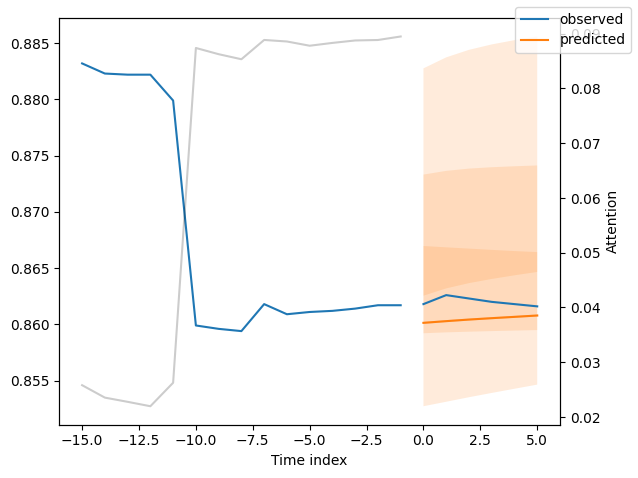

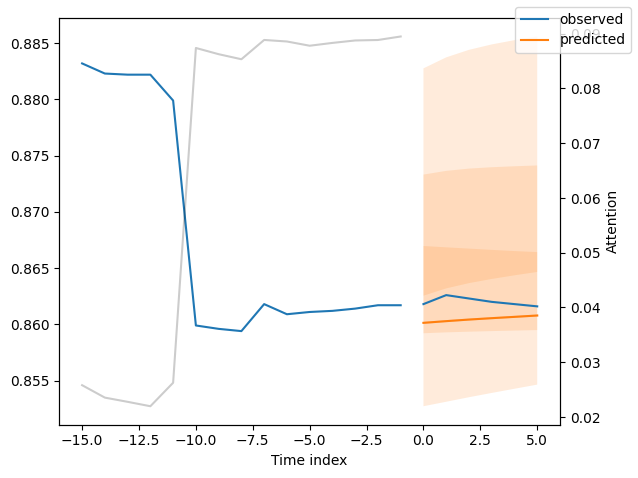

In [ ]:
raw_prediction = tft.predict(
    training.filter(lambda x: (x.time_idx_first_prediction == 15)),
    mode="raw",
    return_x=True,
)
tft.plot_prediction(raw_prediction.x, raw_prediction.output, idx=0)

In [ ]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
INFO: GPU available: False, used

Model saved to /content/drive/My Drive/tft_model.pkl
Model loaded successfully.


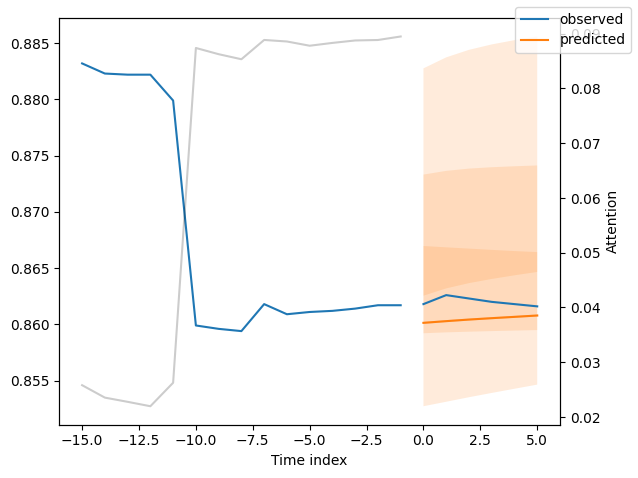

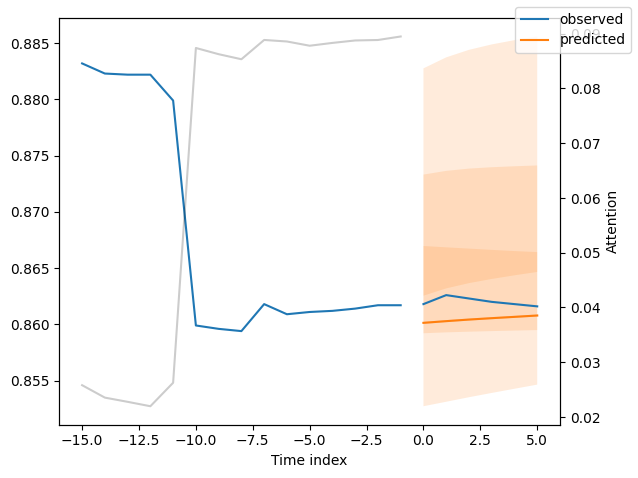

In [ ]:
import pickle
# Path to save the model in Google Drive
model_save_path = "/content/drive/My Drive/tft_model.pkl"

# Save the trained model to Google Drive
with open(model_save_path, 'wb') as f:
    pickle.dump(best_tft, f)

print(f"Model saved to {model_save_path}")

# Load the model back from Google Drive
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully.")

# Make predictions on a filtered dataset
raw_prediction = loaded_model.predict(
    training.filter(lambda x: (x.time_idx_first_prediction == 15)),
    mode="raw",
    return_x=True,
)

# Plot the prediction
loaded_model.plot_prediction(raw_prediction.x, raw_prediction.output, idx=0)

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Load your dataset
file_path = '/content/drive/MyDrive/Forex_Data/DAT_ASCII_AUDCAD_M1_2007.csv'
headers = ['DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume']
df = pd.read_csv(file_path, delimiter=";", names=headers)

# Use the "Bar CLOSE Bid Quote" for prediction
data = df['Bar CLOSE Bid Quote'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Create sequences
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 60
X, y = create_sequences(data_normalized, SEQ_LENGTH)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Create DataLoader
dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Define the Time Series Transformer model
# Define the Time Series Transformer model
class TimeSeriesTransformer(nn.Module):
    def __init__(self, num_layers, d_model, nhead, seq_length, dim_feedforward=128, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.input_layer = nn.Linear(seq_length, d_model)  # Project the input to the d_model dimension
        self.positional_encoding = nn.Parameter(torch.zeros(1, seq_length, d_model))  # (1, seq_length, d_model)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.linear = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.input_layer(x)  # (batch_size, seq_length, d_model)
        x = x.unsqueeze(1) + self.positional_encoding  # Expand dimensions for positional encoding and add it
        x = self.transformer_encoder(x.squeeze(1))  # Feed into transformer encoder
        x = self.linear(x[:, -1])  # Linear layer on the last time step
        return x

# Model parameters
NUM_LAYERS = 4
D_MODEL = 64
NHEAD = 8
DIM_FEEDFORWARD = 128
DROPOUT = 0.1

# Initialize the model
model = TimeSeriesTransformer(
    num_layers=NUM_LAYERS,
    d_model=D_MODEL,
    nhead=NHEAD,
    seq_length=SEQ_LENGTH,
    dim_feedforward=DIM_FEEDFORWARD,
    dropout=DROPOUT
)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
EPOCHS = 1

for epoch in range(EPOCHS):
    model.train()
    for batch in dataloader:
        X_batch, y_batch = batch
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item()}')

# Evaluate the model and make predictions
model.eval()
with torch.no_grad():
    predictions = model(X_tensor)
    predictions = scaler.inverse_transform(predictions.numpy())

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(data[-len(predictions):], label="Actual")
plt.plot(predictions, label="Predicted")
plt.xlabel("Time")
plt.ylabel("Bar CLOSE Bid Quote")
plt.legend()
plt.show()

Epoch 1/1, Loss: 0.0008414867916144431


In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import os
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau

# Load your dataset
file_path = '/content/drive/MyDrive/Forex_Data/DAT_ASCII_AUDCAD_M1_2007.csv'
headers = ['DateTime Stamp', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote', 'Bar CLOSE Bid Quote', 'Volume']
df = pd.read_csv(file_path, delimiter=";", names=headers)

# Use the "Bar CLOSE Bid Quote" for prediction
data = df['Bar CLOSE Bid Quote'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Create sequences
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 60
X, y = create_sequences(data_normalized, SEQ_LENGTH)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Create Dataset and split into training and validation sets
dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Define the Time Series Transformer model
class TimeSeriesTransformer(nn.Module):
    def __init__(self, num_layers, d_model, nhead, seq_length, dim_feedforward=128, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.input_layer = nn.Linear(seq_length, d_model)  # Project the input to the d_model dimension
        self.positional_encoding = nn.Parameter(torch.zeros(1, seq_length, d_model))  # (1, seq_length, d_model)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.linear = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.input_layer(x)  # (batch_size, seq_length, d_model)
        x = x.unsqueeze(1) + self.positional_encoding  # Expand dimensions for positional encoding and add it
        x = self.transformer_encoder(x.squeeze(1))  # Feed into transformer encoder
        x = self.linear(x[:, -1])  # Linear layer on the last time step
        return x

# Model parameters
NUM_LAYERS = 4
D_MODEL = 64
NHEAD = 8
DIM_FEEDFORWARD = 128
DROPOUT = 0.1
LEARNING_RATE = 0.001
WEIGHT_DECAY = 1e-4  # Weight decay (L2 regularization)

# Initialize the model
model = TimeSeriesTransformer(
    num_layers=NUM_LAYERS,
    d_model=D_MODEL,
    nhead=NHEAD,
    seq_length=SEQ_LENGTH,
    dim_feedforward=DIM_FEEDFORWARD,
    dropout=DROPOUT
)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

# Learning rate scheduler (choose either CosineAnnealingLR or ReduceLROnPlateau)
scheduler = CosineAnnealingLR(optimizer, T_max=10)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)

# Training Function with Early Stopping and Gradient Clipping
def train_model(model, criterion, optimizer, scheduler, num_epochs=20, early_stopping_patience=3):
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for batch in train_loader:
            X_batch, y_batch = batch
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_loader:
                X_batch, y_batch = batch
                output = model(X_batch)
                loss = criterion(output, y_batch)
                val_loss += loss.item() * X_batch.size(0)

        val_loss /= len(val_loader.dataset)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Learning rate scheduling
        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(val_loss)
        else:
            scheduler.step()

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered!")
                break

    print(f"Training completed. Best validation loss: {best_val_loss:.4f}")

# Train the model
train_model(model, criterion, optimizer, scheduler, num_epochs=1, early_stopping_patience=3)

model.eval()
with torch.no_grad():
    predictions = model(X_tensor)
    predictions = scaler.inverse_transform(predictions.numpy())

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(data[-len(predictions):], label="Actual")
plt.plot(predictions, label="Predicted")
plt.xlabel("Time")
plt.ylabel("Bar CLOSE Bid Quote")
plt.legend()
plt.show()

Epoch 1/1, Train Loss: 0.0028, Val Loss: 0.0004
Training completed. Best validation loss: 0.0004
